In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [4]:
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data

dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
def load():
    data = pd.read_csv("titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


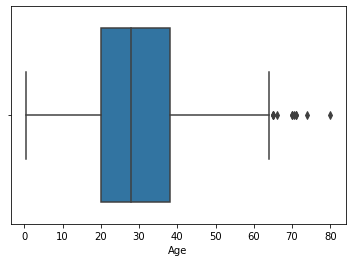

In [6]:
sns.boxplot(x=df["Age"])
plt.show()


# Catch Outliers

In [7]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3-q1
print(iqr)

17.875


In [8]:
up = q3 + 1.5*iqr
low = q3 + 1.5*iqr

In [9]:
df[(df["Age"]<low)|(df["Age"]>up)].index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890], dtype='int64', length=714)

In [10]:
df[(df["Age"]<low)|(df["Age"]>up)].any(axis=None)

True

In [11]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range = quartile3-quartile1
    up_limit = q3 + 1.5* interquantile_range
    low_limit = q1 - 1.5* interquantile_range
    return up_limit,low_limit

In [12]:
up,low = outlier_thresholds(df,"Fare")
df[(df["Fare"]<low)|(df["Fare"]>up)].index

Int64Index([  1,   3,   6,  23,  27,  31,  34,  35,  43,  50,
            ...
            835, 838, 846, 849, 853, 856, 863, 867, 871, 879], dtype='int64', length=198)

In [13]:
def check_outlier(dataframe,col_name):
    up,low=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low)|(dataframe[col_name] > up)].any(axis=None):
     return True
    else:
      return False

In [14]:
check_outlier(df,"Fare")

True

In [15]:
def grab_col_name(dataframe,cat_th=10,car_th=20):
    cat_cols    =  [col for col in dataframe.columns if dataframe[col].dtype == ("o")]
    num_but_cat =  [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype !="O" ]
    cat_but_car =  [col for col in dataframe.columns if dataframe[col].nunique()< car_th and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype !="O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"observations:{dataframe.shape[0]}")
    print(f"variables:{dataframe.shape[1]}")
    print(f'cat_cols:{len(cat_cols)}')
    print(f'num_cols:{len(num_cols)}')
    print(f'cat_but_car:{len(cat_but_car)}')
    print(f'num_but_car:{len(num_but_cat)}')
    return cat_cols,num_cols,cat_but_car


In [16]:
cat_cols,num_cols,cat_but_car = grab_col_name(df)

observations:891
variables:12
cat_cols:4
num_cols:3
cat_but_car:2
num_but_car:4


In [17]:
cat_cols,num_cols,cat_but_car = grab_col_name(dff)

observations:307511
variables:122
cat_cols:39
num_cols:67
cat_but_car:15
num_but_car:39


In [18]:
for col in num_cols:
    print(col,check_outlier(dff,col))

SK_ID_CURR True
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH True
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH True
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG False
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE False
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BA

# Accessing Outliers Themselves

In [19]:
def grab_outliers(dataframe,col_name,index=False):
    up,low = outlier_thresholds(dataframe,col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | dataframe[col_name] > up)].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [20]:
grab_outliers(df,"Age",True)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


Int64Index([  1,   3,   4,   6,  11,  13,  15,  18,  20,  21,
            ...
            867, 871, 872, 873, 874, 879, 881, 883, 885, 890], dtype='int64', length=377)

# Solving the Outlier Problem

In [23]:
def remove_outlier(dataframe,col_name):
    up,low = outlier_thresholds(dataframe,col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low) | ( dataframe[col_name] > up))].head()
    return df_without_outliers

In [24]:
remove_outlier(df,"Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S


### re-assignment with thresholds

In [31]:
def replace_with_thresholds(dataframe,variables):
    up_limit,low_limit = outlier_thresholds(dataframe,variables)
    dataframe.loc[(dataframe[variables]<low_limit),variables] = low_limit
    dataframe.loc[(dataframe[variables]>up_limit),variables] = up_limit
    

In [35]:
for col in num_cols:
    replace_with_thresholds(dff,col)

# Multivariate Outlier Analysis: Local Outlier Factor

In [36]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=['float64','int64'])
df = df.dropna()


In [37]:
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [39]:
for col in df.columns:
    print(col,check_outlier(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [42]:
up,low = outlier_thresholds(df,"carat")
df[(df["carat"]<low)|(df["carat"]>up)].shape

(2566, 7)

In [43]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [55]:
df_scores=clf.negative_outlier_factor_

In [56]:
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [57]:
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [60]:
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

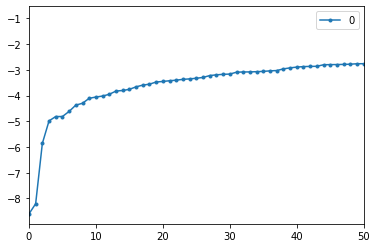

In [61]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked = True,xlim=[0,50],style='.-')
plt.show()

In [62]:
th = np.sort(df_scores)[3]

In [63]:
df[df_scores<th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.000,0.798,0.474,0.200,0.400,0.700,1.040,5.010
depth,53940.000,61.749,1.433,43.000,61.000,61.800,62.500,79.000
table,53940.000,57.457,2.234,43.000,56.000,57.000,59.000,95.000
price,53940.000,3932.800,3989.440,326.000,950.000,2401.000,5324.250,18823.000
x,53940.000,5.731,1.122,0.000,4.710,5.700,6.540,10.740
y,53940.000,5.735,1.142,0.000,4.720,5.710,6.540,58.900
z,53940.000,3.539,0.706,0.000,2.910,3.530,4.040,31.800


In [66]:
df[df_scores<th].drop(axis=0,labels = df[df_scores<th].index)

,carat,depth,table,price,x,y,z


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.000,0.798,0.474,0.200,0.400,0.700,1.040,5.010
depth,53940.000,61.749,1.433,43.000,61.000,61.800,62.500,79.000
table,53940.000,57.457,2.234,43.000,56.000,57.000,59.000,95.000
price,53940.000,3932.800,3989.440,326.000,950.000,2401.000,5324.250,18823.000
x,53940.000,5.731,1.122,0.000,4.710,5.700,6.540,10.740
y,53940.000,5.735,1.142,0.000,4.720,5.710,6.540,58.900
z,53940.000,3.539,0.706,0.000,2.910,3.530,4.040,31.800
